 # Oil Price Prediction - Group3

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats

In [2]:
# load the data set
df=pd.read_csv("C:/Users/divya/Downloads/bent oil price.csv")
df

,Date,Closing Value
0,5/20/1987,18.63
1,5/21/1987,18.45
2,5/22/1987,18.55
3,5/25/1987,18.60
4,5/26/1987,18.63
...,...,...
9414,6/20/2023,75.79
9415,6/21/2023,76.92
9416,6/22/2023,73.93
9417,6/23/2023,73.56


In [3]:
df.head()

,Date,Closing Value
0,5/20/1987,18.63
1,5/21/1987,18.45
2,5/22/1987,18.55
3,5/25/1987,18.60
4,5/26/1987,18.63


In [4]:
df.columns

Index(['Date', 'Closing Value'], dtype='object')

In [5]:
df.columns = ["Date","Price"]
df.head()

,Date,Price
0,5/20/1987,18.63
1,5/21/1987,18.45
2,5/22/1987,18.55
3,5/25/1987,18.60
4,5/26/1987,18.63


# Exploratory Data Analysis(EDA)

In [6]:
# basic information
# parsing string to the date-time format
df["Date"]=pd.to_datetime(df["Date"], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9419 entries, 0 to 9418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9419 non-null   datetime64[ns]
 1   Price   9161 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 147.3 KB


In [7]:
# extracting data into 'year and month' with 'date' variable
df["year"]=pd.DatetimeIndex(df["Date"]).year
df["month"]=pd.DatetimeIndex(df["Date"]).month
df["day"]=pd.DatetimeIndex(df["Date"]).day
df["Weekday Name"]=pd.DatetimeIndex(df["Date"]).day_name()
df

,Date,Price,year,month,day,Weekday Name
0,1987-05-20,18.63,1987,5,20,Wednesday
1,1987-05-21,18.45,1987,5,21,Thursday
2,1987-05-22,18.55,1987,5,22,Friday
3,1987-05-25,18.60,1987,5,25,Monday
4,1987-05-26,18.63,1987,5,26,Tuesday
...,...,...,...,...,...,...
9414,2023-06-20,75.79,2023,6,20,Tuesday
9415,2023-06-21,76.92,2023,6,21,Wednesday
9416,2023-06-22,73.93,2023,6,22,Thursday
9417,2023-06-23,73.56,2023,6,23,Friday


In [8]:
df.dtypes

Date            datetime64[ns]
Price                  float64
year                     int64
month                    int64
day                      int64
Weekday Name            object
dtype: object

In [9]:
# describe the data
df.describe()

,Price,year,month,day
count,9161.000000,9419.000000,9419.000000,9419.000000
mean,48.948246,2004.931309,6.520968,15.731075
std,32.852682,10.430073,3.444099,8.800965
min,9.100000,1987.000000,1.000000,1.000000
25%,19.150000,1996.000000,4.000000,8.000000
50%,40.450000,2005.000000,7.000000,16.000000
75%,71.620000,2014.000000,10.000000,23.000000
max,143.950000,2023.000000,12.000000,31.000000


In [10]:
# find the duplicates
df.duplicated().sum()

0

In [11]:
# find the null values
df.isnull().sum()

Date              0
Price           258
year              0
month             0
day               0
Weekday Name      0
dtype: int64

In [12]:
# replae null values with-'nan'
df.dropna(inplace=True)
df.isnull().sum()

Date            0
Price           0
year            0
month           0
day             0
Weekday Name    0
dtype: int64

In [13]:
# correlation
df.corr()

,Price,year,month,day
Price,1.000000,0.724499,-0.005962,-0.000839
year,0.724499,1.000000,-0.040617,-0.003262
month,-0.005962,-0.040617,1.000000,-0.011407
day,-0.000839,-0.003262,-0.011407,1.000000


In [14]:
# unique values
df["Date"].unique()
df["Price"].unique()
df["year"].unique()
df["month"].unique()
df["day"].unique()

array([20, 21, 22, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  8,  9, 10, 11,
       12, 16, 17, 18, 19, 23, 24, 30,  6,  7, 13, 14, 15, 31],
      dtype=int64)

# Visualization

<AxesSubplot:xlabel='Price', ylabel='count'>

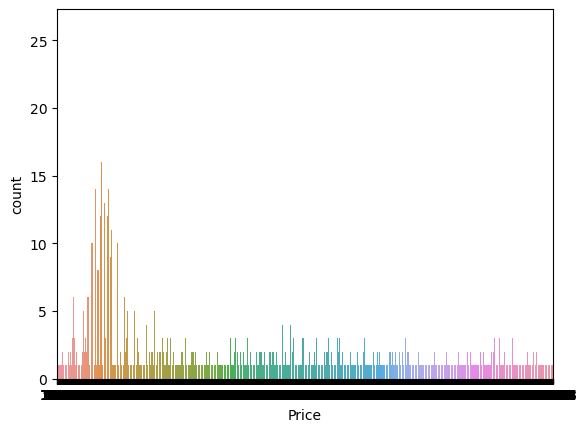

In [15]:
# visualize the unique counts
sns.countplot(df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

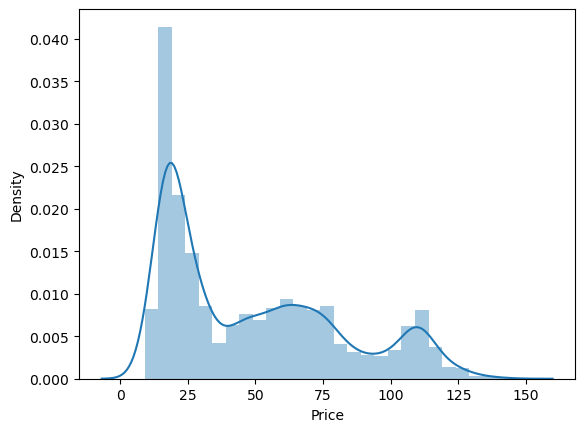

In [16]:
sns.distplot(df["Price"])

<AxesSubplot:xlabel='month', ylabel='Price'>

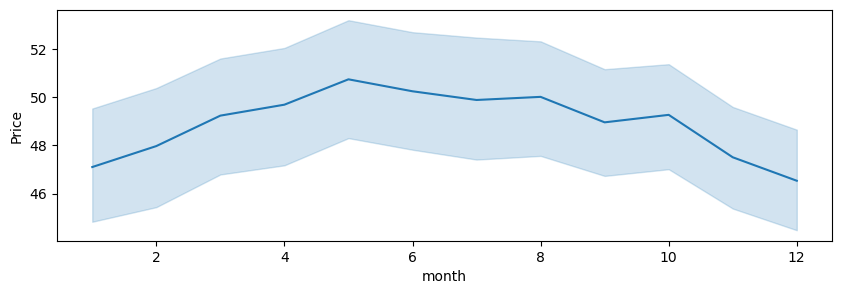

In [17]:
# lineplot for month and price
plt.figure(figsize=(10,3))
sns.lineplot(x="month", y="Price", data=df)

<AxesSubplot:xlabel='year', ylabel='Price'>

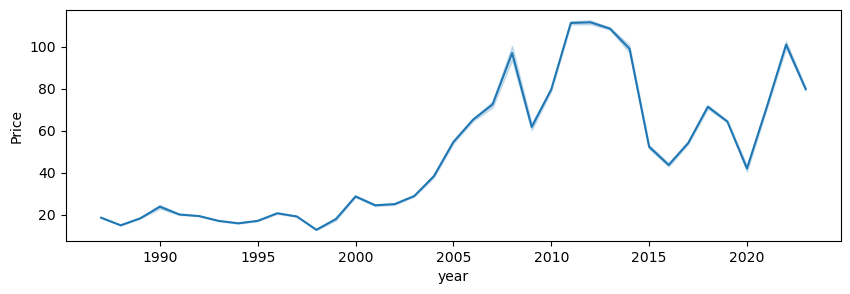

In [18]:
# lineplot for year and price
plt.figure(figsize=(10,3))
sns.lineplot(x="year", y="Price", data=df)

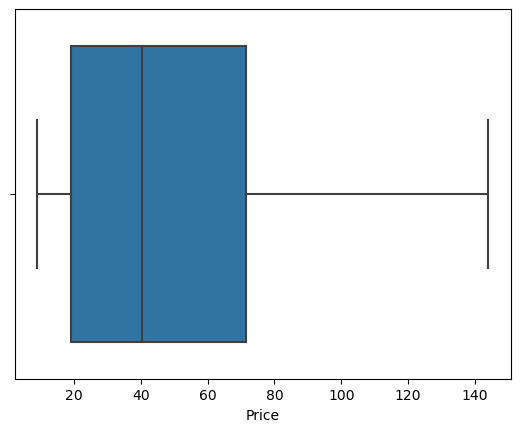

In [19]:
# Boxplot
sns.boxplot(df.Price)
plt.show()

No Outliers present in the respected boxplot.

# Uses
* The interquartile range has a breakdown point of 25% due to which it is often preferred over the total range.
* The IQR is used to build boxplots, simple graphical representations of a probability distribution.
* The IQR can also be used to identify the outliers in the given data set.
* The IQR gives the central tendency of the data.

In [20]:
df.median()

Price      40.45
year     2005.00
month       7.00
day        16.00
dtype: float64

In [21]:
# First quartile(Q1)
Q1 = df["Price"].quantile(0.25)
Q1

19.15

In [22]:
# Third quartile(Q3)
Q3 = df["Price"].quantile(0.75)
Q3

71.62

In [23]:
# IQR 
IQR = Q3 - Q1
IQR

52.470000000000006

In [24]:
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

In [25]:
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

Upper limit 150.32500000000002
Lower limit -59.555000000000014


<function matplotlib.pyplot.show(close=None, block=None)>

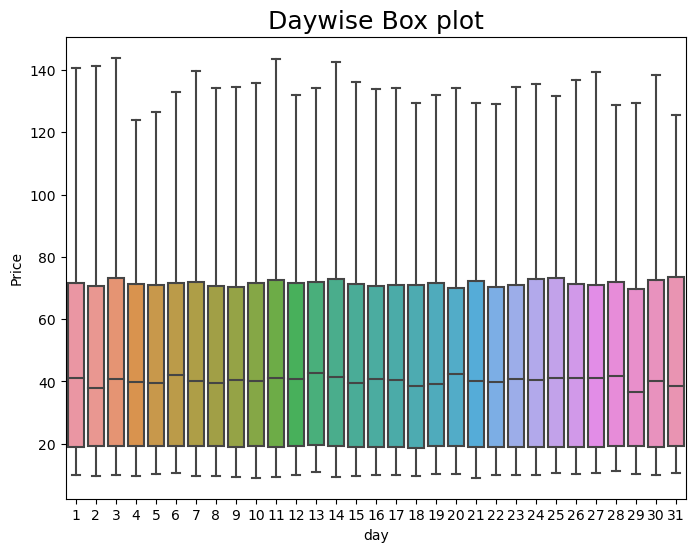

In [26]:
# boxplot of day vs price
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="Price", data=df)
plt.title("Daywise Box plot", fontsize=18)
plt.show

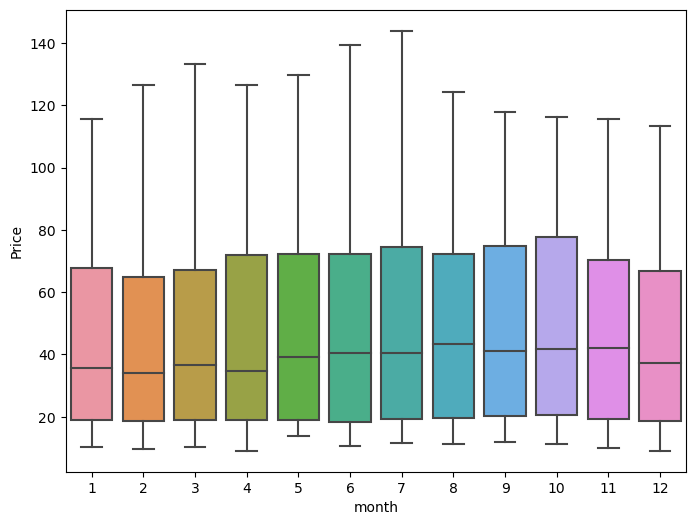

In [27]:
# Boxplot of 'month vs Price'
plt.figure(figsize=(8,6))
sns.boxplot(x="month", y="Price", data=df)
plt.show()

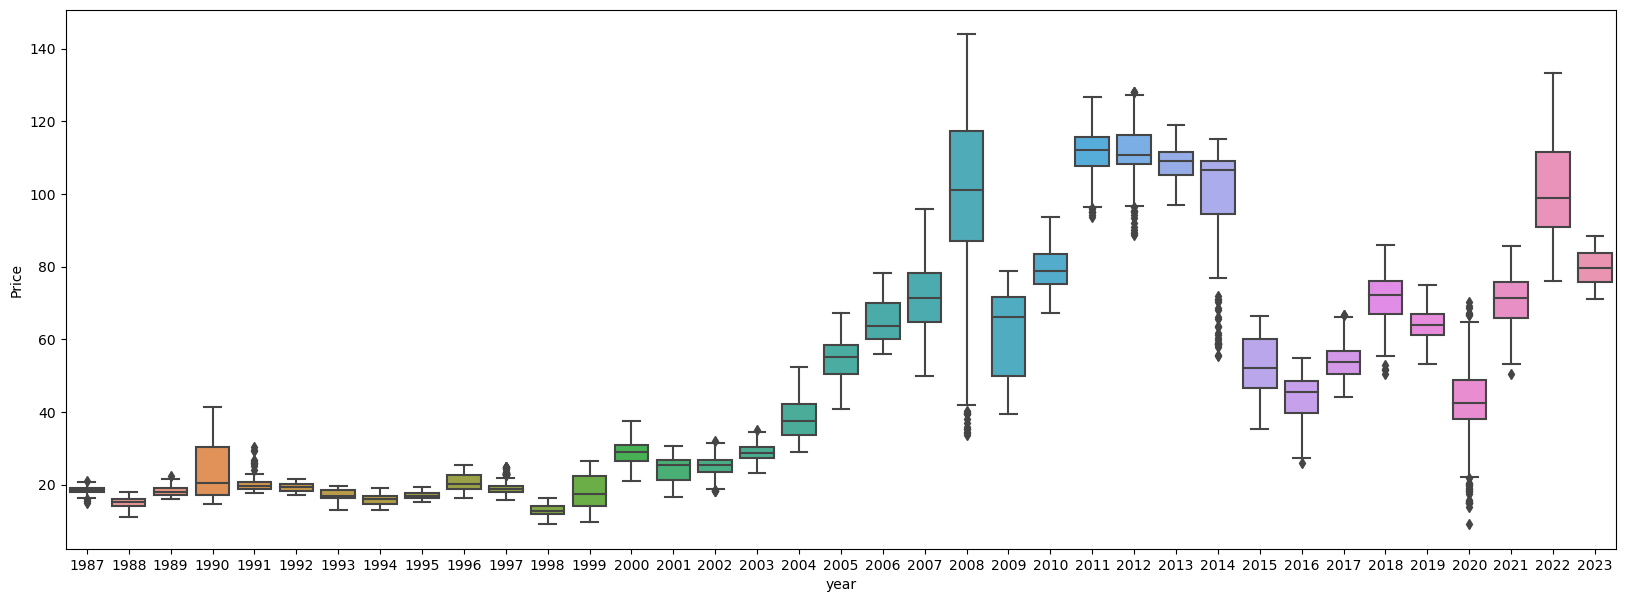

In [28]:
# Boxplot of 'year vs Price'
plt.figure(figsize=(20,7))
sns.boxplot(x="year", y="Price", data=df)
plt.show()

In [29]:
# correlation plot
df.corr()

,Price,year,month,day
Price,1.000000,0.724499,-0.005962,-0.000839
year,0.724499,1.000000,-0.040617,-0.003262
month,-0.005962,-0.040617,1.000000,-0.011407
day,-0.000839,-0.003262,-0.011407,1.000000


<AxesSubplot:xlabel='month', ylabel='year'>

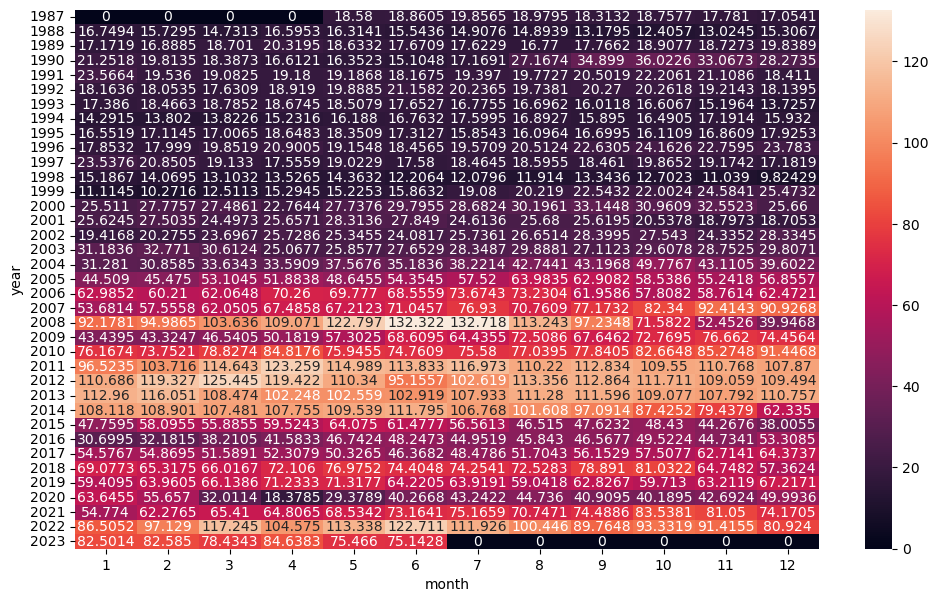

In [31]:
# Heatmap
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=df,values="Price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:>

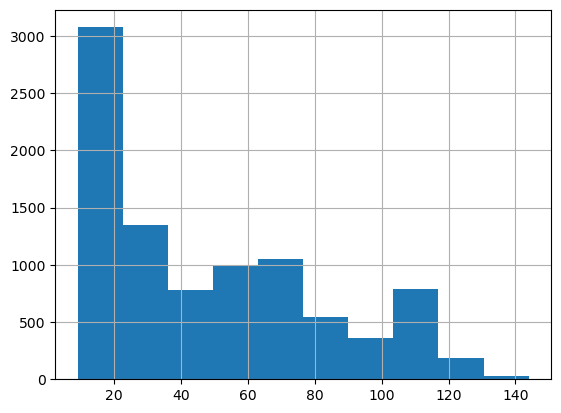

In [32]:
# histogram
df["Price"].hist()

The data is positively skewed.

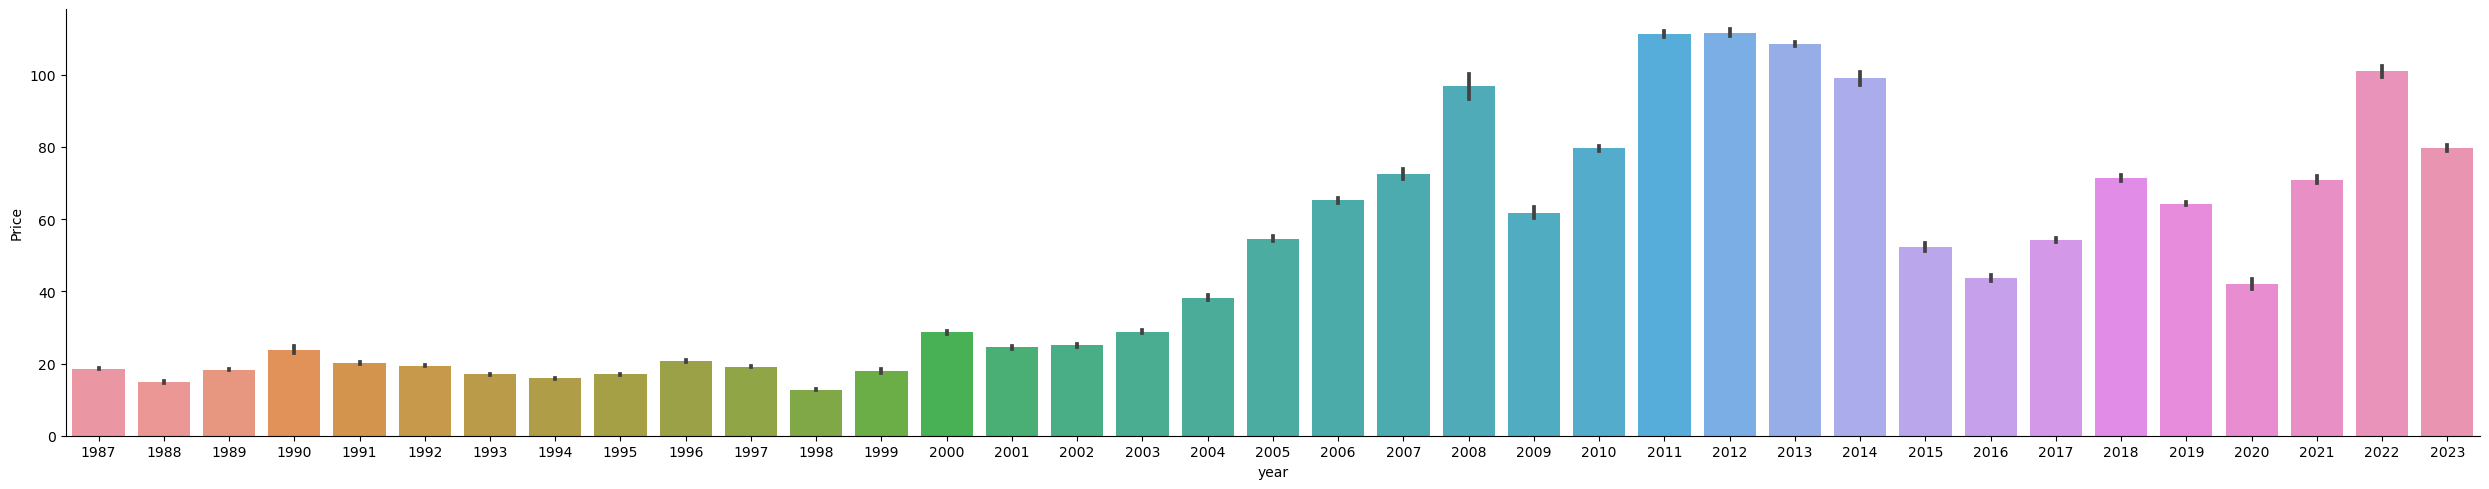

In [33]:
# Cat plot
sns.catplot(x="year", y="Price", data=df, kind="bar", aspect=5)

<AxesSubplot:ylabel='Density'>

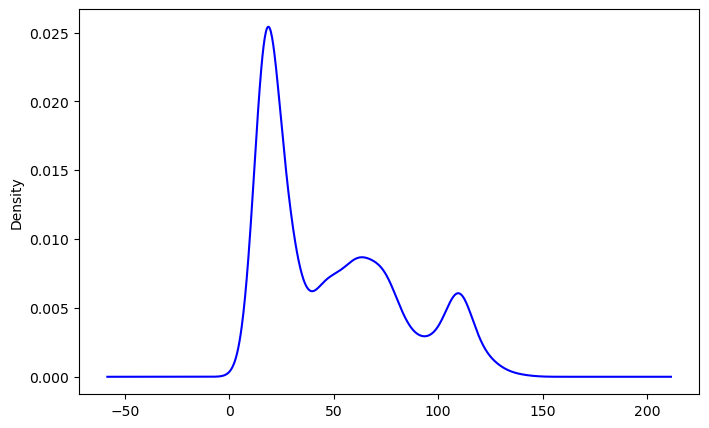

In [34]:
# density plot    
df["Price"].plot(kind='kde', figsize=(8,5), color="Blue")

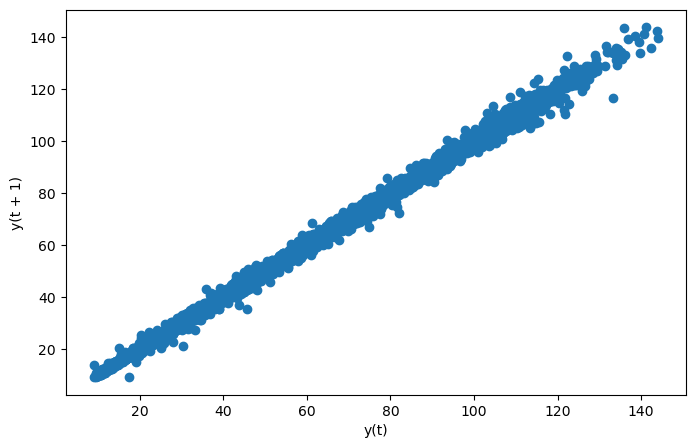

In [35]:
# lag plot
from pandas.plotting import lag_plot
plt.figure(figsize=(8,5))
lag_plot(df["Price"])
plt.show()

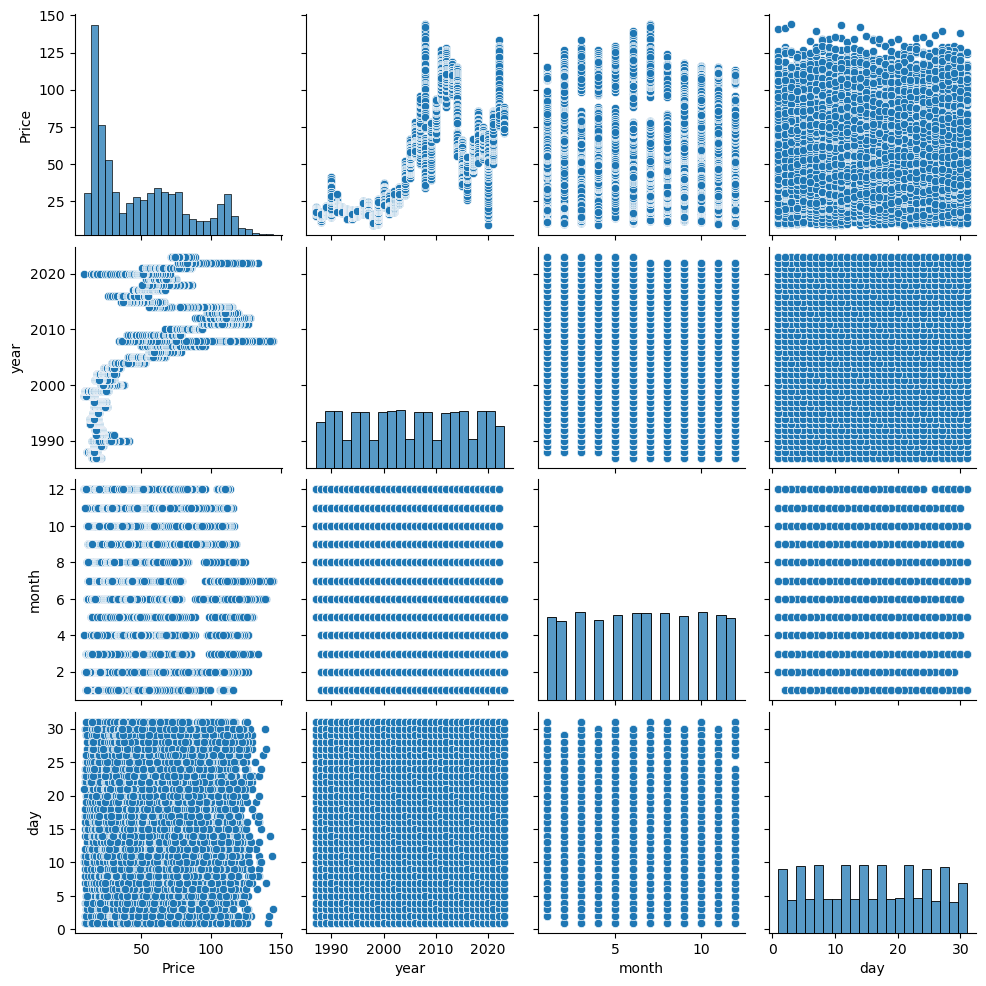

In [36]:
# pair plot
sns.pairplot(df)

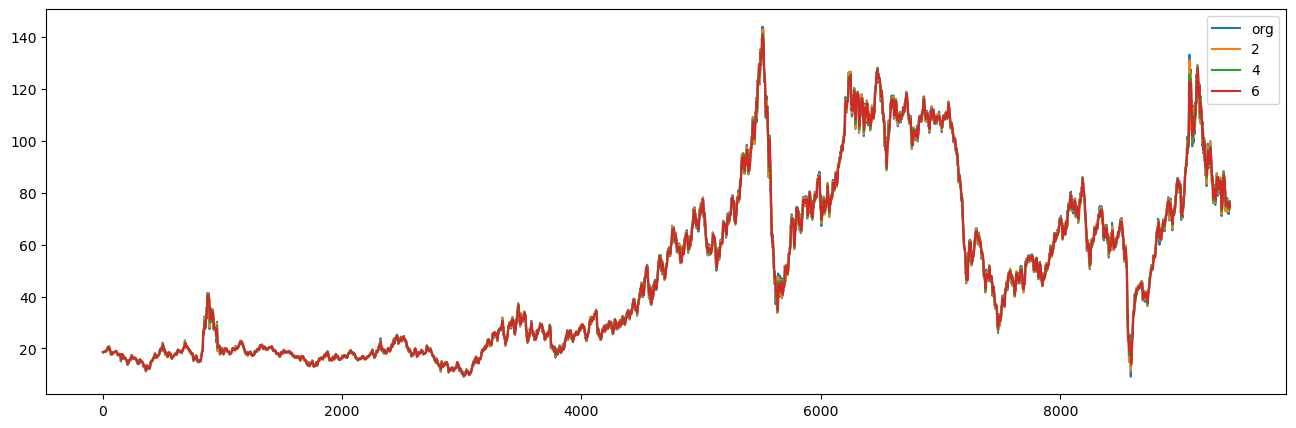

In [37]:
plt.figure(figsize=(16,5))
df.Price.plot(label="org")
for i in range(2,8,2):
    df["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

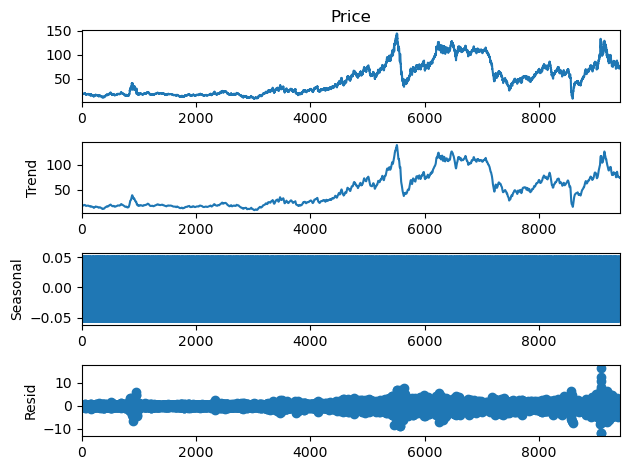

In [38]:
#Timeseries decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Price,period=12)
decompose_ts_add.plot()
plt.show()

In [39]:
msk=(df.index < len(df)-30)
train = df[msk].copy()
len(train)

8884

In [40]:
test = df[~msk].copy()
len(test)

277

# ADF Test

In [41]:
# Augmented Dickeyfuller Test(ADF)
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df.Price)
print("ADF Statistic:", adf[0])
print("p-value of ADF test is:", adf[1])

ADF Statistic: -2.156611281101569
p-value of ADF test is: 0.2223680384854061


since the p-value is >0.05 we fail to reject null-hypothesis

Data is not Stationry.

In [42]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

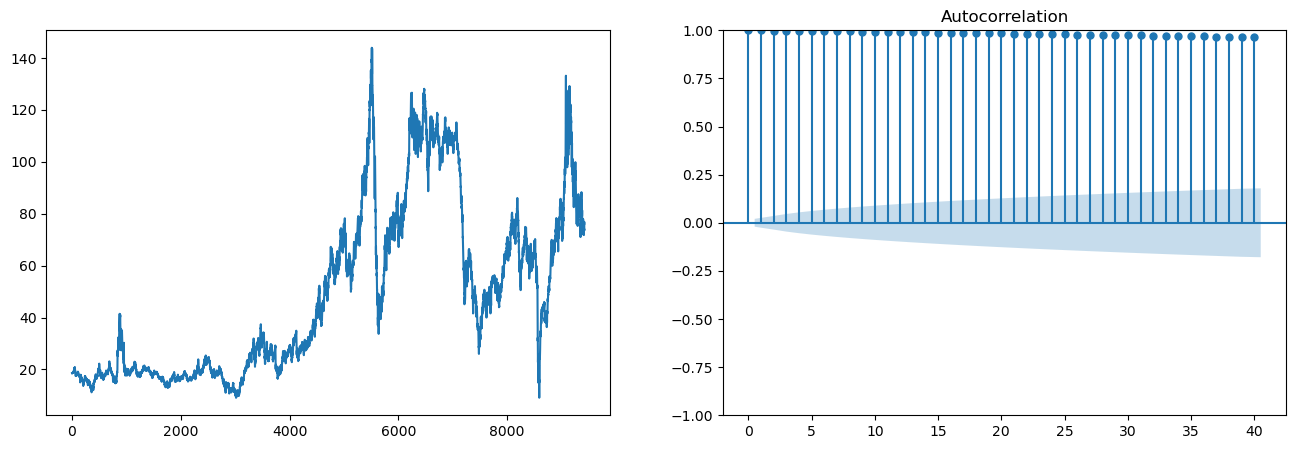

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
ax1.plot(df.Price)
plot_acf(df.Price, ax=ax2)
plt.show()

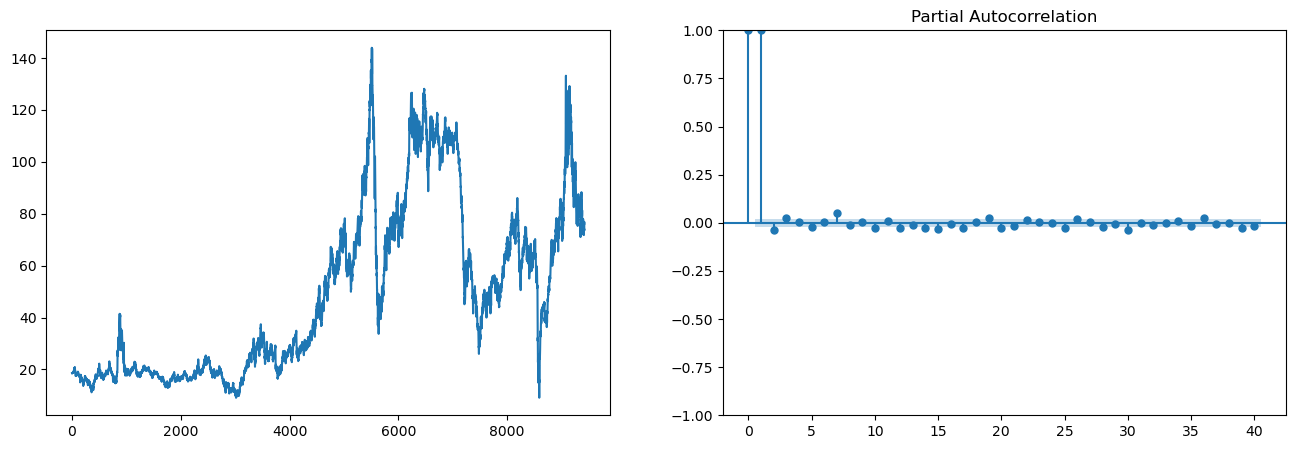

In [44]:
# PACF plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
ax1.plot(df.Price)
plot_pacf(df.Price, ax=ax2)
plt.show()

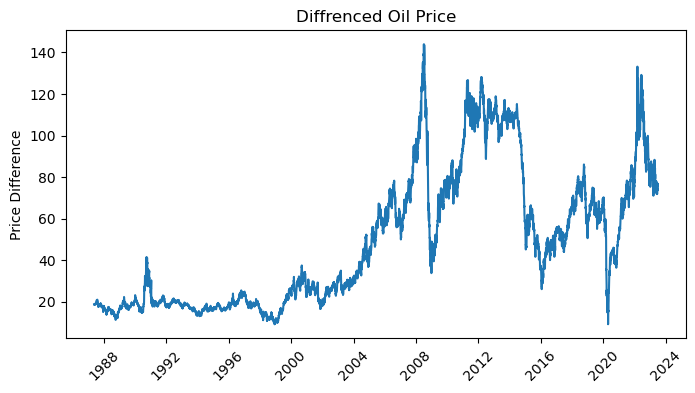

In [45]:
# Transform stationary to differencing method
plt.figure(figsize=(8,4))
plt.plot(df["Date"], df["Price"])
plt.title("Diffrenced Oil Price")
plt.xlabel=("Date")
plt.ylabel("Price Difference")
plt.xticks(rotation=45)
plt.show()

In [46]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Price,test="adf")# ndiff gives the order of differencing

1

Here we got difference(d) as 1.

In [48]:
df_stationary = df["Price"].diff().dropna()

In [49]:
# dickeyfuller test after Differencing method
adf1 = adfuller(df_stationary)# difference plot
print("ADF Statistic:", adf1[1])
print("p-value of ADF test is:", adf1[1])

ADF Statistic: 9.940644302716314e-29
p-value of ADF test is: 9.940644302716314e-29


Here significance level(<0.05) is less than the p-value, hence the data is Stationary.

# Splitting data into train and test

In [50]:
df_stationary.shape

(9160,)

In [51]:
9160*0.8 #(80% of data is training)

7328.0

In [52]:
x=df
train=x[0:7328]
test=x[7328:]
train.shape, test.shape

((7328, 6), (1833, 6))

In [53]:
test.head()

,Date,Price,year,month,day,Weekday Name
7537,2016-04-08,40.71,2016,4,8,Friday
7538,2016-04-11,41.58,2016,4,11,Monday
7539,2016-04-12,43.02,2016,4,12,Tuesday
7540,2016-04-13,42.81,2016,4,13,Wednesday
7541,2016-04-14,43.02,2016,4,14,Thursday


In [54]:
test.tail()

,Date,Price,year,month,day,Weekday Name
9414,2023-06-20,75.79,2023,6,20,Tuesday
9415,2023-06-21,76.92,2023,6,21,Wednesday
9416,2023-06-22,73.93,2023,6,22,Thursday
9417,2023-06-23,73.56,2023,6,23,Friday
9418,2023-06-26,73.86,2023,6,26,Monday


# ARIMA model

In [55]:
# Arima model - auto fit the arima model to determine arima model parameters as p,q
import pmdarima as pm
auto_arima = pm.auto_arima(train.Price, stepwise=True)
auto_arima

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

* Since the order of difference as 1, hence the d term in ARIMA as 1.
* In ARIMA we got parameters p,q as 2, and d as 1.
* Plug the p,d&q values in ARIMA (p=2, d=1, q=2).

In [56]:
# Training the model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train.Price, order=(2,1,2))
result = model.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 7328
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10815.470
Date:                Thu, 20 Jul 2023   AIC                          21640.940
Time:                        14:00:01   BIC                          21675.437
Sample:                             0   HQIC                         21652.800
                               - 7328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4431      0.003    156.710      0.000       0.438       0.449
ar.L2         -0.9893      0.003   -343.087      0.000      -0.995      -0.984
ma.L1         -0.4328      0.004   -122.634      0.0

# Residual plot

In [57]:
residuals = pd.DataFrame(result.resid)

(array([2.91180674e-04, 1.65002382e-03, 3.23695850e-02, 3.05594118e-01,
        1.51413951e-02, 3.39710787e-04, 1.45590337e-04, 4.85301124e-05,
        0.00000000e+00, 4.85301124e-05]),
 array([-9.48921823, -6.67729641, -3.86537458, -1.05345276,  1.75846906,
         4.57039089,  7.38231271, 10.19423453, 13.00615635, 15.81807818,
        18.63      ]),
 <BarContainer object of 10 artists>)

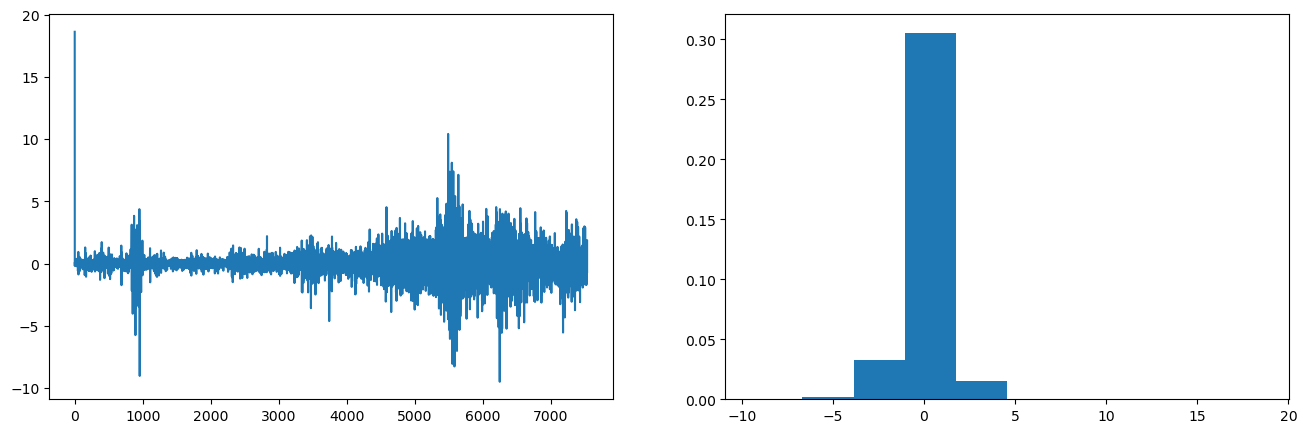

In [58]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

# Model Prediction

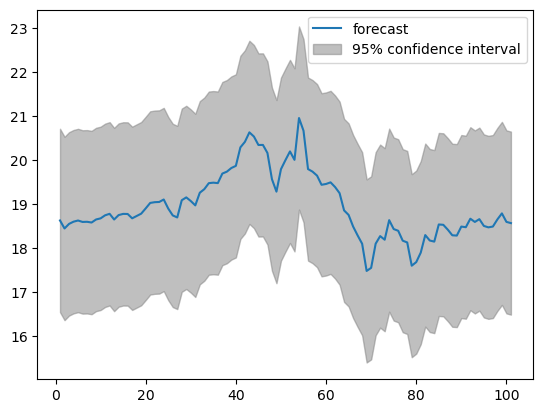

In [59]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result,start=1, end=100, dynaic=False);

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

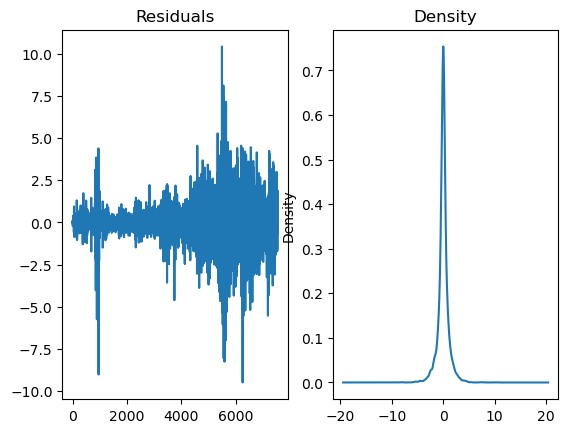

In [60]:
residuals = result.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(title="Density", kind="kde", ax=ax[1])

In [61]:
pred = result.predict(start=7328, end=9419)
pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7328    37.152774
7329    37.116775
7330    37.098081
7331    37.125411
7332    37.156014
          ...    
9415    37.127717
9416    37.127717
9417    37.127717
9418    37.127717
9419    37.127717
Name: predicted_mean, Length: 2092, dtype: float64

In [62]:
pred = pd.DataFrame(pred)
pred.rename(columns={"Predicted_Mean":"Price"}, inplace=True)

In [63]:
pred.head()

,predicted_mean
7328,37.152774
7329,37.116775
7330,37.098081
7331,37.125411
7332,37.156014


# Actual vs Predicted plot

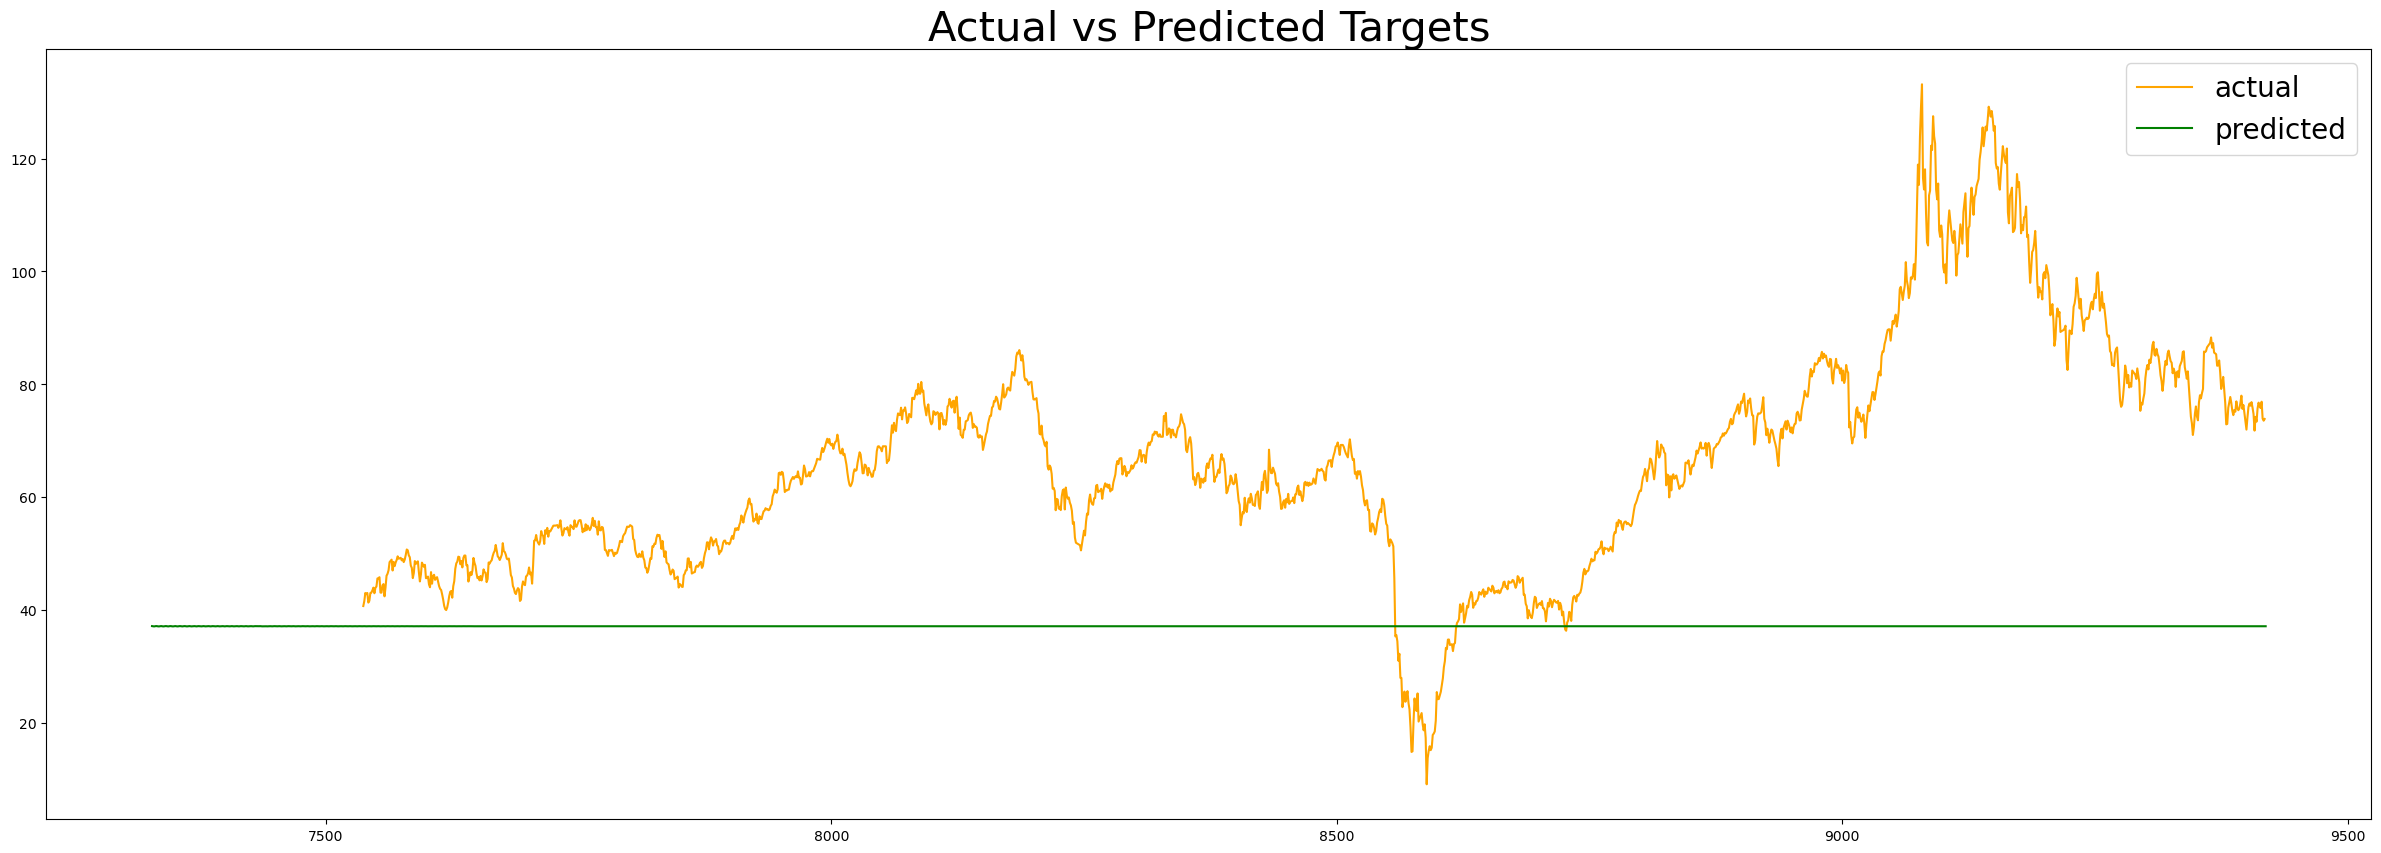

In [64]:
plt.figure(figsize=(30,10))
plt.plot(test.Price,color="orange",label="actual")
plt.plot(pred,color="green",label="predicted")
plt.title("Actual vs Predicted Targets", fontsize=30)
plt.legend(fontsize=20)
plt.show()

# Prophet 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from math import sqrt

In [8]:
df=pd.read_csv("C:/Users/divya/Downloads/bent oil price.csv")
df

,Date,Closing Value
0,5/20/1987,18.63
1,5/21/1987,18.45
2,5/22/1987,18.55
3,5/25/1987,18.60
4,5/26/1987,18.63
...,...,...
9414,6/20/2023,75.79
9415,6/21/2023,76.92
9416,6/22/2023,73.93
9417,6/23/2023,73.56


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9419 entries, 0 to 9418
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9419 non-null   object 
 1   Closing Value  9161 non-null   float64
dtypes: float64(1), object(1)
memory usage: 147.3+ KB


In [10]:
df.isna().sum()

Date               0
Closing Value    258
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [12]:
df.rename(columns={'Date': 'ds', 'Closing Value': 'y'}, inplace=True)

In [13]:
df.ds=pd.to_datetime(df.ds)

In [14]:
# converting to monthly data
df =df.resample('M', on='ds').mean()
df

,y
ds,
1987-05-31,18.580000
1987-06-30,18.860476
1987-07-31,19.856522
1987-08-31,18.979524
1987-09-30,18.313182
...,...
2023-02-28,82.585000
2023-03-31,78.434348
2023-04-30,84.638333


In [15]:
# splitting data into train and test
train_data = df.sample(frac=0.8, random_state=10)

In [16]:
test_data = df.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

train_data = train_data.reset_index()
test_data = test_data.reset_index()

training data size : (347, 1)
testing data size : (87, 1)


In [17]:
test_data.head()

,ds,y
0,1987-09-30,18.313182
1,1988-01-31,16.749444
2,1988-04-30,16.595263
3,1988-06-30,15.543636
4,1988-08-31,14.893913


# Model Building

In [76]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math

In [4]:
from prophet import Prophet

In [18]:
model = Prophet()
model.fit(train_data)

19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:00 - cmdstanpy - INFO - Chain [1] done processing


# Model Prediction

In [19]:
prediction = model.predict(pd.DataFrame({'ds': test_data['ds']}))
y_actual = test_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)

In [20]:
prediction.set_index("ds")

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1987-09-30,12.268847,-13.627112,28.921745,12.268847,12.268847,-3.017268,-3.017268,-3.017268,-3.017268,-3.017268,-3.017268,0.0,0.0,0.0,9.251578
1988-01-31,12.599689,-13.230840,32.268685,12.599689,12.599689,-2.804545,-2.804545,-2.804545,-2.804545,-2.804545,-2.804545,0.0,0.0,0.0,9.795144
1988-04-30,12.841768,-6.825368,36.397593,12.841768,12.841768,2.998054,2.998054,2.998054,2.998054,2.998054,2.998054,0.0,0.0,0.0,15.839822
1988-06-30,13.005844,-8.263173,36.395941,13.005844,13.005844,0.093029,0.093029,0.093029,0.093029,0.093029,0.093029,0.0,0.0,0.0,13.098873
1988-08-31,13.172610,-5.765948,37.537664,13.172610,13.172610,3.520680,3.520680,3.520680,3.520680,3.520680,3.520680,0.0,0.0,0.0,16.693290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,67.102014,43.297049,86.707480,67.102014,67.102014,-2.834947,-2.834947,-2.834947,-2.834947,-2.834947,-2.834947,0.0,0.0,0.0,64.267068
2022-10-31,65.901174,43.621156,88.617963,65.901174,65.901174,-0.354763,-0.354763,-0.354763,-0.354763,-0.354763,-0.354763,0.0,0.0,0.0,65.546411
2022-12-31,65.602189,41.795072,85.514141,65.602189,65.602189,-2.916444,-2.916444,-2.916444,-2.916444,-2.916444,-2.916444,0.0,0.0,0.0,62.685745


# Test data vs Predicted

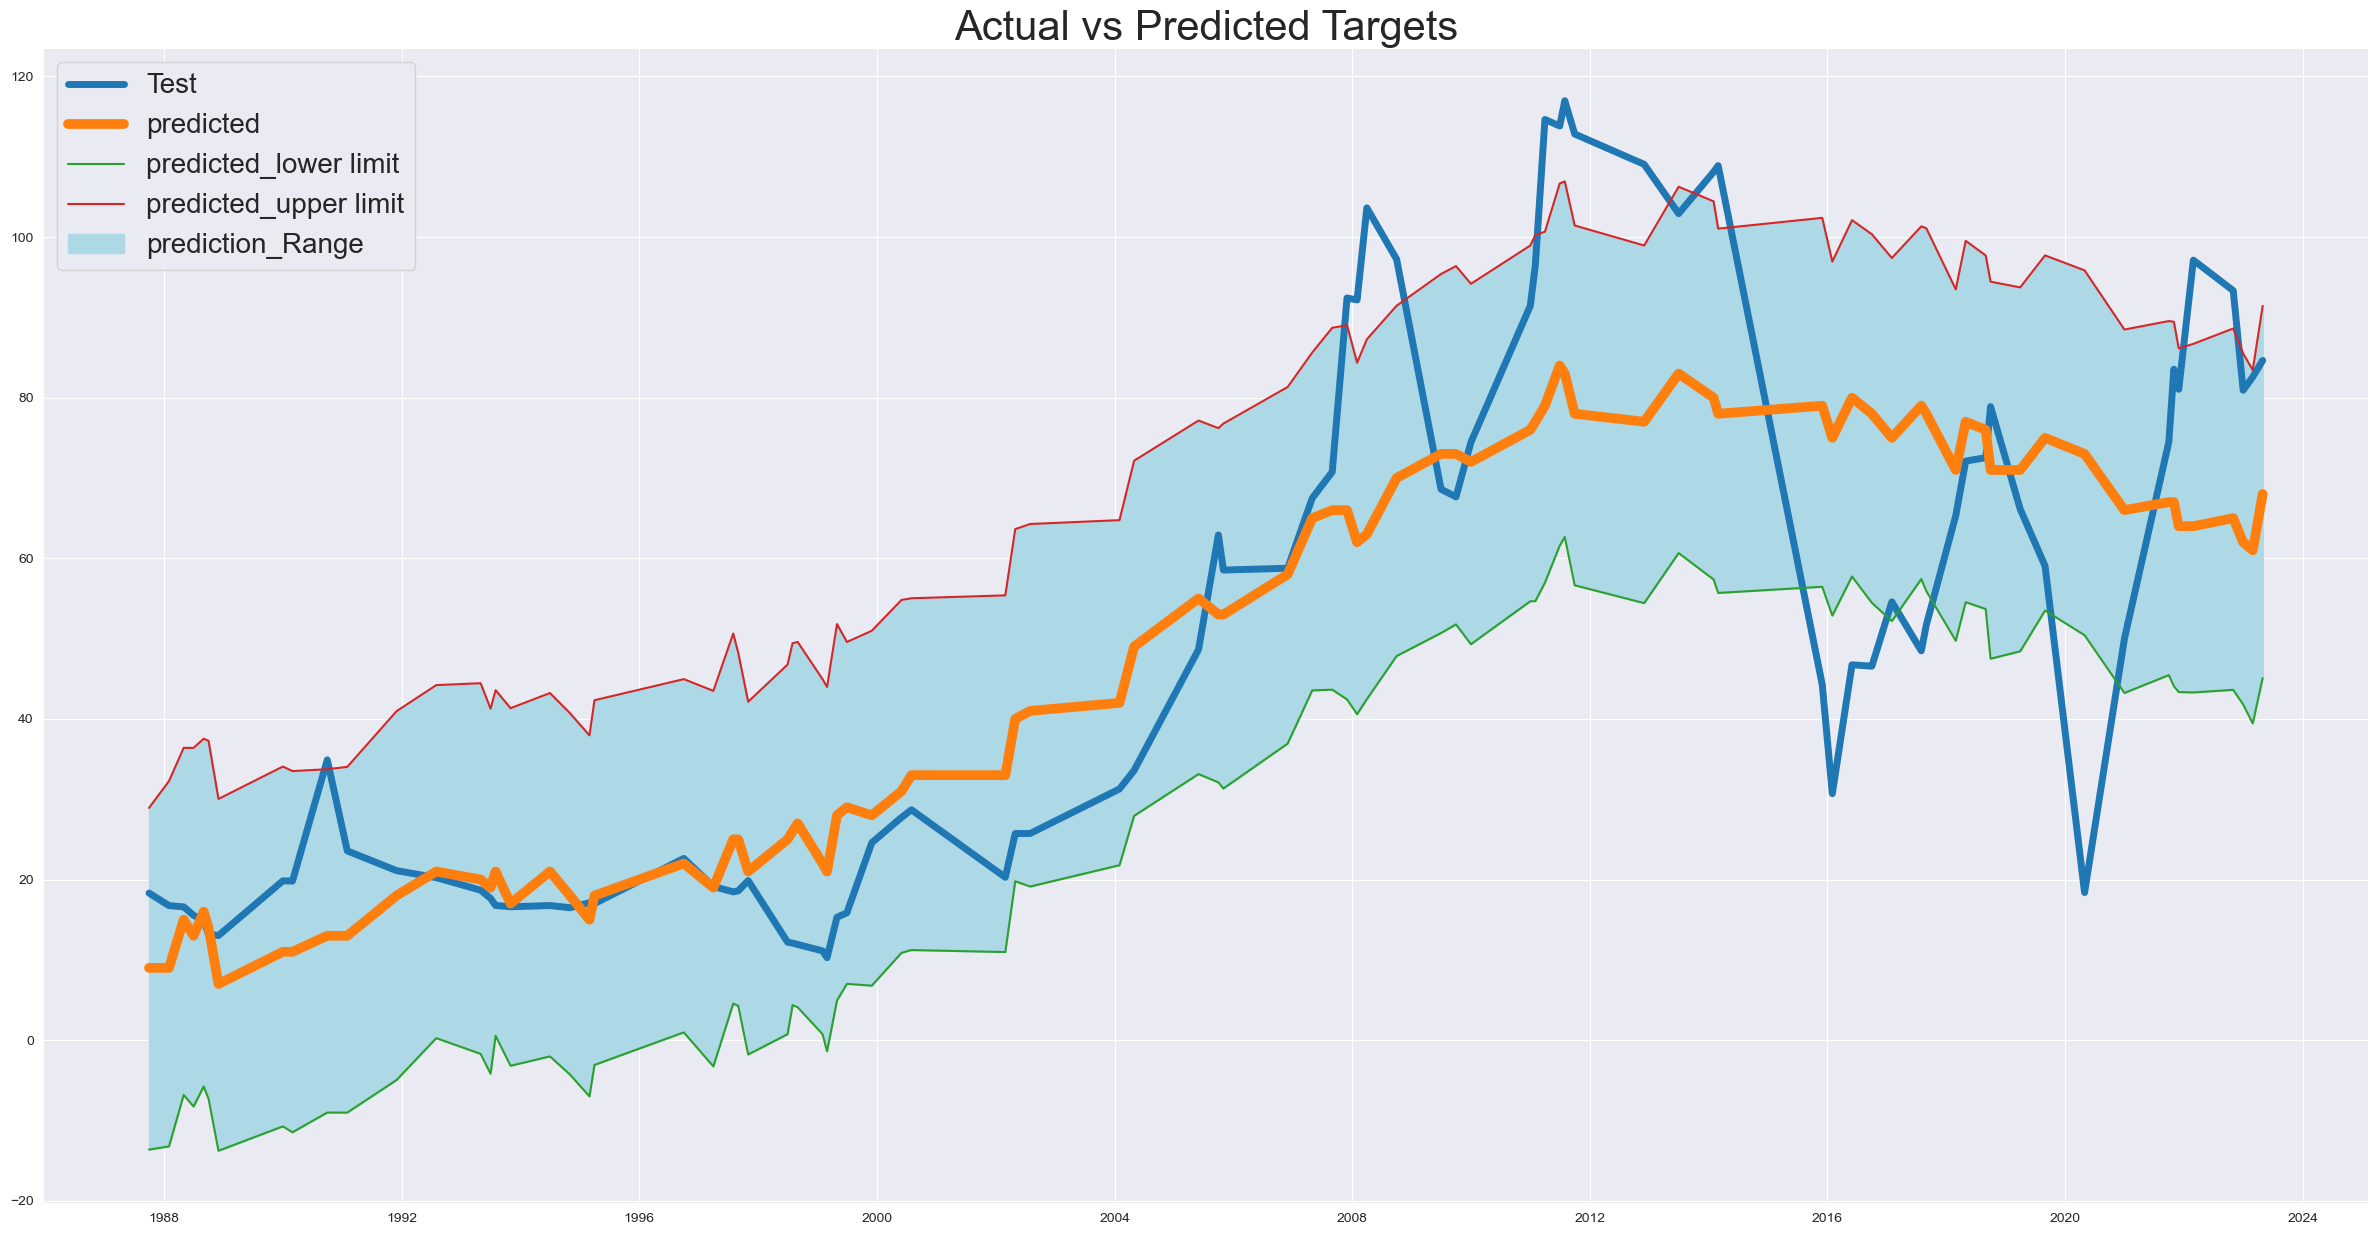

In [21]:
plt.figure(figsize=(30,15))
plt.plot(prediction.ds,y_actual,label="Test",linewidth=5.0)
plt.plot(prediction.ds,y_predicted,label="predicted",linewidth=7.0)
plt.plot(prediction.ds,prediction.yhat_lower,label="predicted_lower limit")
plt.plot(prediction.ds,prediction.yhat_upper,label="predicted_upper limit")
plt.fill_between(prediction.ds,prediction.yhat_lower,prediction.yhat_upper, color="lightblue", label="prediction_Range")
plt.title("Actual vs Predicted Targets", fontsize=30)
plt.legend(fontsize=20)
plt.show()

# Model Evaluation

In [83]:
rmse_prophet = sqrt(mean_squared_error(y_actual, y_predicted))
print("Rmse:", rmse_prophet)

Rmse: 18.68472170335681


In [84]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [85]:
mape_prophet = MAPE(y_actual, y_predicted)
print("MAPE:",mape_prophet)

MAPE: 31.667091429107497


In [86]:
model_score = {"Models":pd.Series(["FB prophet"]),\
              "MAPE_score":pd.Series([mape_prophet]),\
              "Rmse_score":pd.Series([rmse_prophet])}
score=pd.DataFrame(model_score)
score

,Models,MAPE_score,Rmse_score
0,FB prophet,31.667091,18.684722


In [24]:
import pickle

In [25]:
with open('p_model', 'wb') as f:
    pickle.dump(model, f)